# Predictive Modeling of Market Mood Index vs NIFTY Index

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)
data.columns = [col.strip() for col in data.columns]

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Linear Regression Analysis

In [2]:
X = data[['Market Mood Index']]
y = data['Nifty Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(23020022.98109577, -0.0076281435803726705)

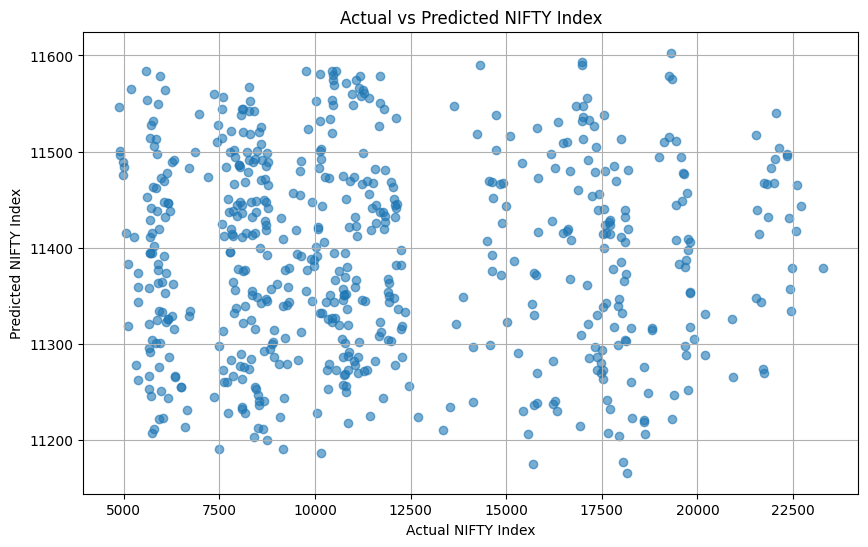

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual NIFTY Index')
plt.ylabel('Predicted NIFTY Index')
plt.title('Actual vs Predicted NIFTY Index')
plt.grid(True)
plt.show()

## ARIMA Modeling

In [4]:
from statsmodels.tsa.arima.model import ARIMA

arima_data = data.set_index('Date')['Nifty Index'].dropna()

arima_model = ARIMA(arima_data, order=(5, 1, 0))
arima_result = arima_model.fit()

arima_result.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Nifty Index   No. Observations:                 2979
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18487.683
Date:                Sun, 09 Jun 2024   AIC                          36987.365
Time:                        01:04:32   BIC                          37023.359
Sample:                             0   HQIC                         37000.317
                               - 2979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0298      0.010     -3.118      0.002      -0.049      -0.011
ar.L2          0.0136      0.009      1.462      0.144      -0.005       0.032
ar.L3         -0.0279      0.010     -2.783      0.005      -0.048      -0.008
ar.L4          0.0490      0.013      3.891      0.000       0.024       0.074
ar.L5          0.0404      0.011      3.632      0.000       0.019       0.062
sigma2      1.446e+04    173.381     83.424      0.000    1.41e+04    1.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             20251.96
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


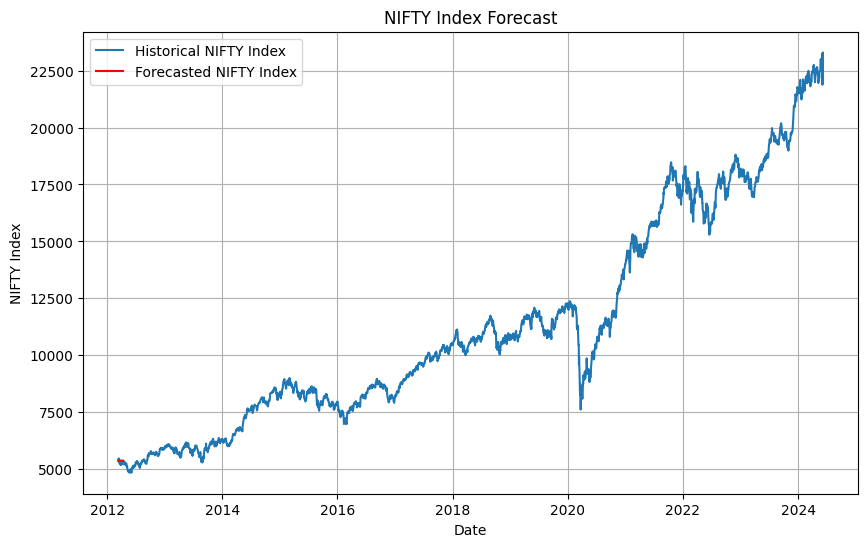

In [5]:
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=arima_data.index[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean

plt.figure(figsize=(10, 6))
plt.plot(arima_data.index, arima_data, label='Historical NIFTY Index')
plt.plot(forecast_index, forecast_values, label='Forecasted NIFTY Index', color='red')
plt.xlabel('Date')
plt.ylabel('NIFTY Index')
plt.title('NIFTY Index Forecast')
plt.legend()
plt.grid(True)
plt.show()